In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [3]:
!kaggle datasets download -d teertha/personal-loan-modeling

personal-loan-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip '*.zip'

Archive:  personal-loan-modeling.zip
replace Bank_Personal_Loan_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
df.drop(['ID','ZIP Code','Securities Account'], axis=1, inplace= True)

In [10]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [12]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

<function matplotlib.pyplot.show>

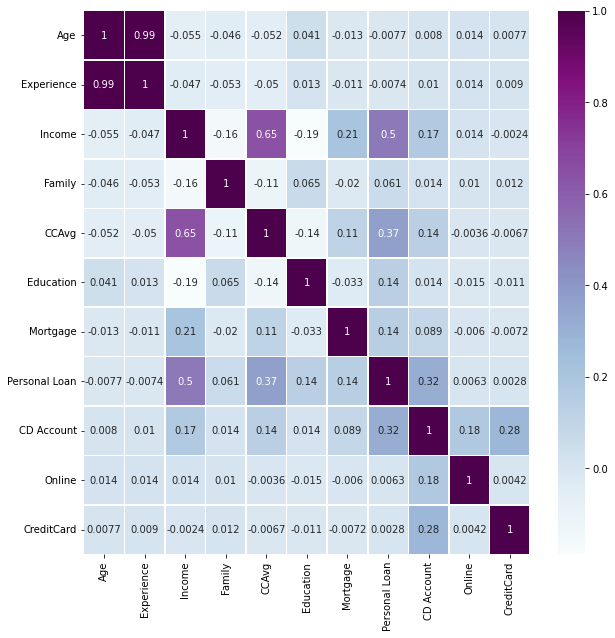

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

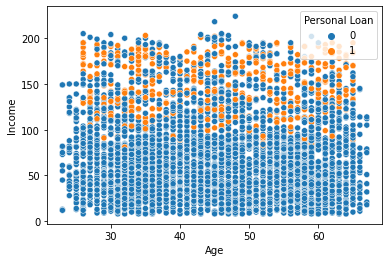

In [14]:
sns.scatterplot(x = 'Age', y = 'Income', data = df, hue = 'Personal Loan')

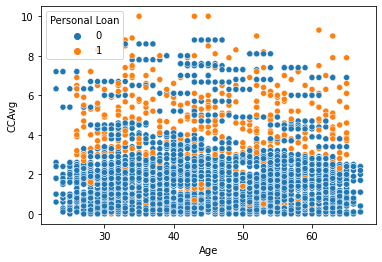

In [15]:
sns.scatterplot(x = 'Age', y = 'CCAvg', data = df, hue = 'Personal Loan')

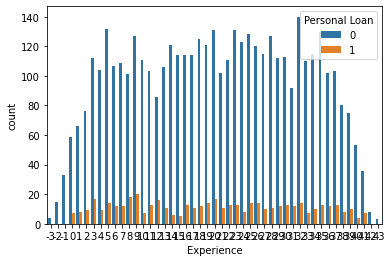

In [16]:
sns.countplot(x='Experience', hue = 'Personal Loan', data = df)

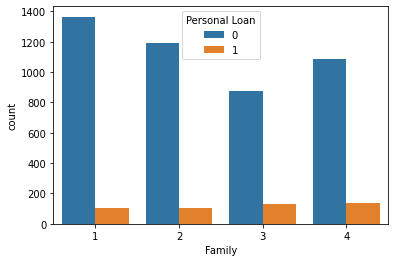

In [17]:
sns.countplot(x='Family', hue = 'Personal Loan', data = df)

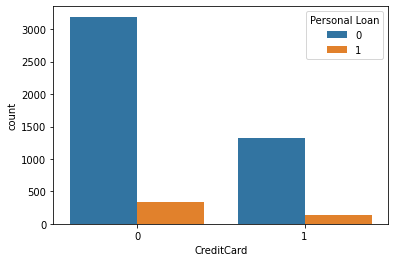

In [18]:
sns.countplot(x='CreditCard', hue = 'Personal Loan', data = df)

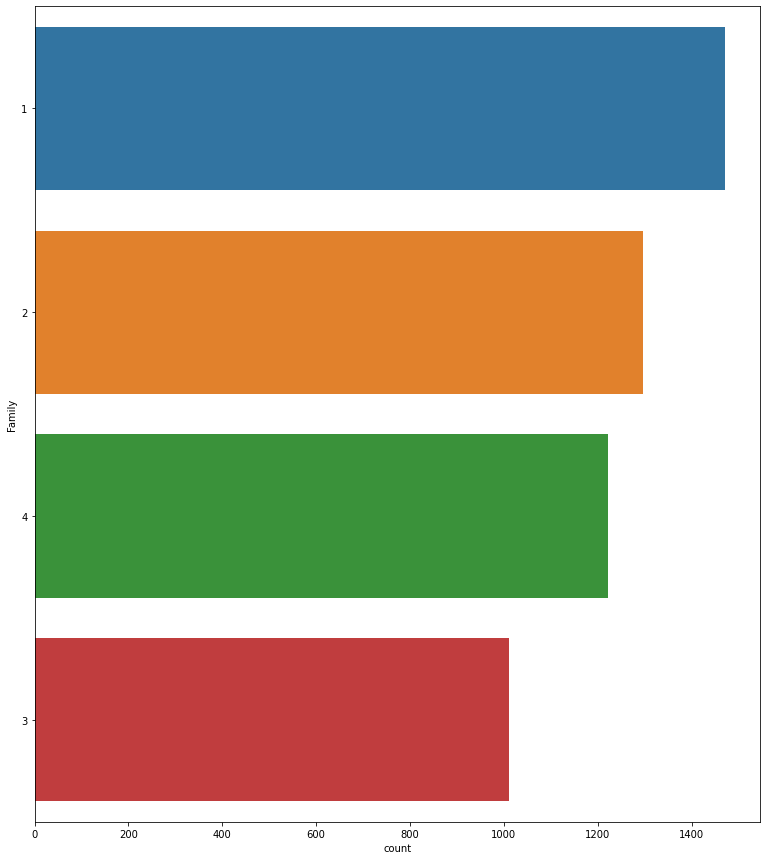

In [19]:
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='Family', data=df.fillna('n/a'),
              order =df.fillna('n/a')['Family'].value_counts().index)

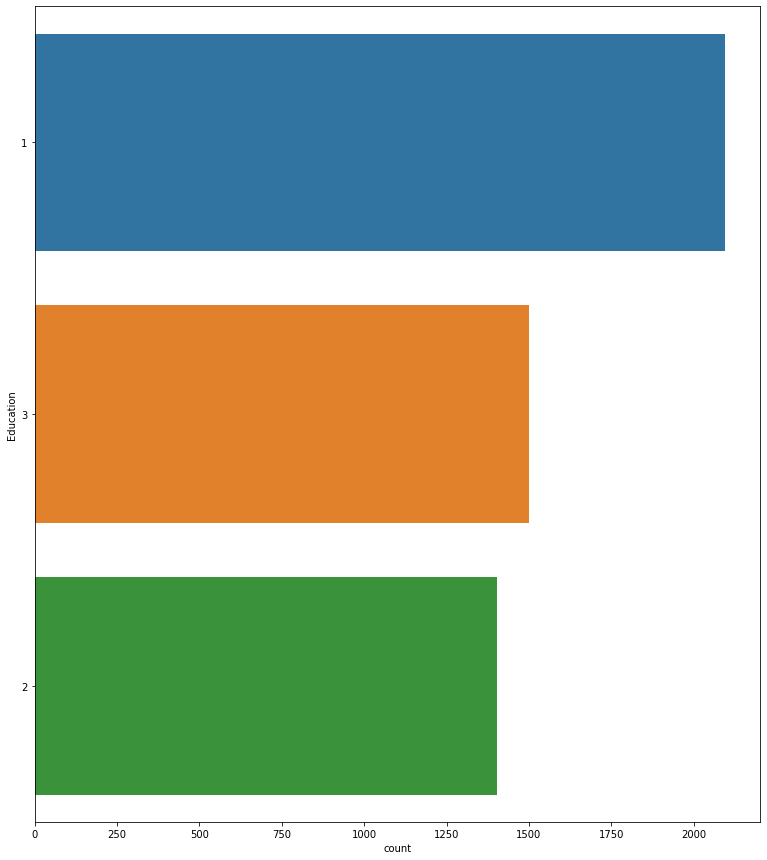

In [20]:
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='Education', data=df.fillna('n/a'),
              order =df.fillna('n/a')['Education'].value_counts().index)

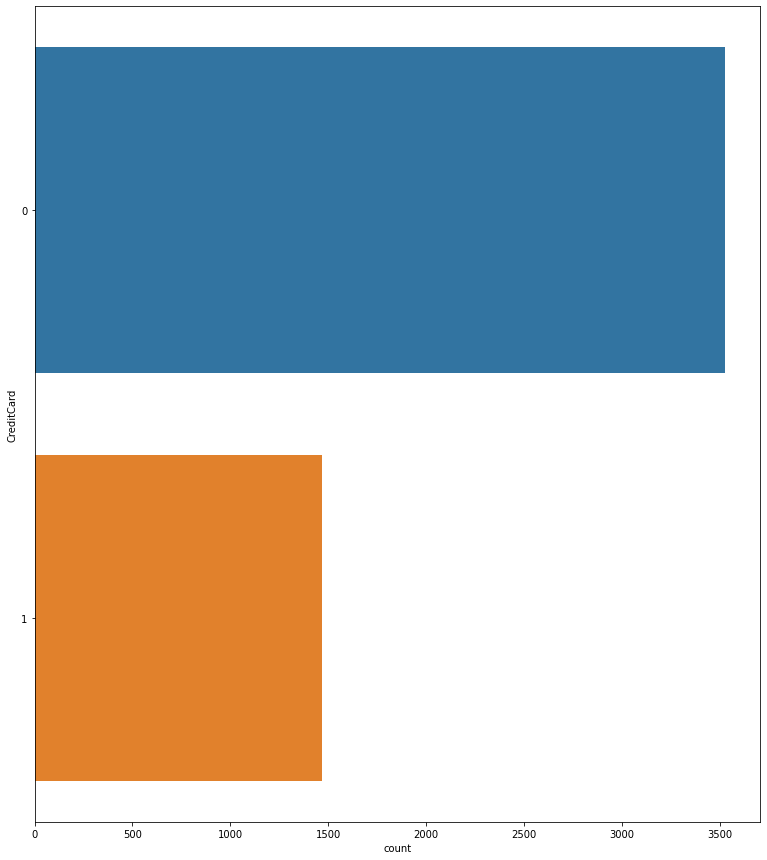

In [21]:
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='CreditCard', data=df.fillna('n/a'),
              order =df.fillna('n/a')['CreditCard'].value_counts().index)

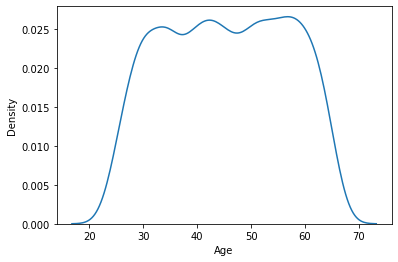

In [22]:
sns.kdeplot(x=df['Age'])

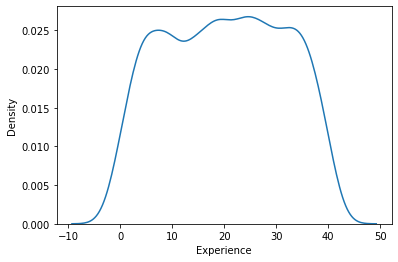

In [23]:
sns.kdeplot(x=df['Experience'])

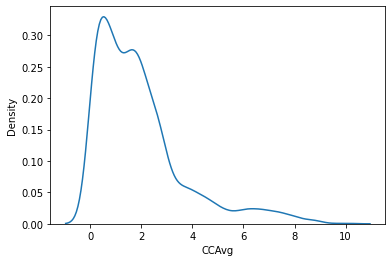

In [24]:
sns.kdeplot(x=df['CCAvg'])

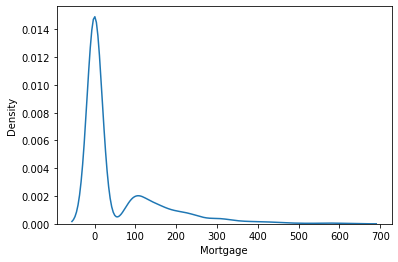

In [25]:
sns.kdeplot(x=df['Mortgage'])

In [26]:
category_cols = ['Family', 'CreditCard', 'Education' ]

for col in category_cols:
  df[col] = df[col].astype('category')

df.dtypes

Age                 int64
Experience          int64
Income              int64
Family           category
CCAvg             float64
Education        category
Mortgage            int64
Personal Loan       int64
CD Account          int64
Online              int64
CreditCard       category
dtype: object

In [27]:
df_onehot = pd.get_dummies(df)
df_onehot.shape

(5000, 17)

In [28]:
df_onehot.isnull().sum()

Age              0
Experience       0
Income           0
CCAvg            0
Mortgage         0
Personal Loan    0
CD Account       0
Online           0
Family_1         0
Family_2         0
Family_3         0
Family_4         0
Education_1      0
Education_2      0
Education_3      0
CreditCard_0     0
CreditCard_1     0
dtype: int64

In [29]:
X_data = df_onehot.drop(['Personal Loan'], axis=1)
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5000 non-null   int64  
 1   Experience    5000 non-null   int64  
 2   Income        5000 non-null   int64  
 3   CCAvg         5000 non-null   float64
 4   Mortgage      5000 non-null   int64  
 5   CD Account    5000 non-null   int64  
 6   Online        5000 non-null   int64  
 7   Family_1      5000 non-null   uint8  
 8   Family_2      5000 non-null   uint8  
 9   Family_3      5000 non-null   uint8  
 10  Family_4      5000 non-null   uint8  
 11  Education_1   5000 non-null   uint8  
 12  Education_2   5000 non-null   uint8  
 13  Education_3   5000 non-null   uint8  
 14  CreditCard_0  5000 non-null   uint8  
 15  CreditCard_1  5000 non-null   uint8  
dtypes: float64(1), int64(6), uint8(9)
memory usage: 317.5 KB


In [30]:
y_data = df_onehot.iloc[:,5].values.reshape(-1,1)

In [31]:
print(X_data.shape)
print(y_data.shape)

(5000, 16)
(5000, 1)


In [32]:
from sklearn import preprocessing

min_max_scaler =preprocessing.MinMaxScaler()
X_data = min_max_scaler.fit_transform(X_data)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.33, random_state=42
)

In [34]:
X_train.shape, X_test.shape

((3350, 16), (1650, 16))

In [35]:
y_train.shape, y_test.shape

((3350, 1), (1650, 1))

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X_train, y_train.flatten())

LogisticRegression()

In [37]:
logreg.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [38]:
logreg.predict_proba(X_test[:5])

array([[9.97562258e-01, 2.43774150e-03],
       [7.97661404e-01, 2.02338596e-01],
       [9.78356628e-01, 2.16433716e-02],
       [9.99273454e-01, 7.26546013e-04],
       [9.87615637e-01, 1.23843634e-02]])

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_true = y_test.copy()
y_pred = logreg.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[1473,    7],
       [  63,  107]])

In [40]:
accuracy_score(y_true, y_pred)

0.9575757575757575

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [42]:
y_hat = knn.predict(X_test)

In [43]:
from sklearn import metrics
knn_matrix =metrics.confusion_matrix(y_test, y_hat)
knn_matrix

array([[1478,    2],
       [  98,   72]])

In [44]:
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1480
           1       0.97      0.42      0.59       170

    accuracy                           0.94      1650
   macro avg       0.96      0.71      0.78      1650
weighted avg       0.94      0.94      0.93      1650



In [45]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [46]:
y_hat = svm_model.predict(X_test)

In [47]:
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
svm_matrix

array([[1480,    0],
       [  40,  130]])

# 의사결정

In [48]:
df_onehot.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'CD Account', 'Online', 'Family_1', 'Family_2', 'Family_3', 'Family_4',
       'Education_1', 'Education_2', 'Education_3', 'CreditCard_0',
       'CreditCard_1'],
      dtype='object')

In [49]:
df1 = df_onehot[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'CD Account', 'Online', 'Family_1', 'Family_2', 'Family_3', 'Family_4',
       'Education_1', 'Education_2', 'Education_3', 'CreditCard_0',
       'CreditCard_1', 'Personal Loan']]

In [50]:
split_count = int(df1.shape[0]*0.8)
split_count

4000

In [51]:
train = df1[:split_count].copy()
train.shape

(4000, 17)

In [52]:
test = df1[split_count:].copy()
test.shape

(1000, 17)

In [53]:
feature_names = train.columns[:-1].tolist()
feature_names

['Age',
 'Experience',
 'Income',
 'CCAvg',
 'Mortgage',
 'CD Account',
 'Online',
 'Family_1',
 'Family_2',
 'Family_3',
 'Family_4',
 'Education_1',
 'Education_2',
 'Education_3',
 'CreditCard_0',
 'CreditCard_1']

In [54]:
label_name = train.columns[-1]
label_name

'Personal Loan'

In [55]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(4000, 16)


,Age,Experience,Income,CCAvg,Mortgage,CD Account,Online,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,CreditCard_0,CreditCard_1
0,25,1,49,1.6,0,0,0,0,0,0,1,1,0,0,1,0
1,45,19,34,1.5,0,0,0,0,0,1,0,1,0,0,1,0
2,39,15,11,1.0,0,0,0,1,0,0,0,1,0,0,1,0
3,35,9,100,2.7,0,0,0,1,0,0,0,0,1,0,1,0
4,35,8,45,1.0,0,0,0,0,0,0,1,0,1,0,0,1


In [56]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(4000,)


0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [57]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(1000, 16)


,Age,Experience,Income,CCAvg,Mortgage,CD Account,Online,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,CreditCard_0,CreditCard_1
4000,62,37,93,3.0,0,1,1,0,0,1,0,0,0,1,0,1
4001,61,35,81,1.9,0,0,0,0,0,0,1,0,1,0,1,0
4002,59,34,60,2.8,0,0,1,0,1,0,0,1,0,0,1,0
4003,47,21,39,0.6,0,0,1,0,0,1,0,0,1,0,0,1
4004,65,39,22,0.7,0,0,0,0,0,1,0,0,1,0,1,0


In [58]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(1000,)


4000    1
4001    0
4002    0
4003    0
4004    0
Name: Personal Loan, dtype: int64

In [59]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [60]:
from time import time
start = time()
model.fit(X_train, y_train)
print('학습에 소요된 시간은 {}'.format(time() - start))

학습에 소요된 시간은 0.012810707092285156


In [61]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 0, 0, 0, 0])

[Text(0.6514084507042254, 0.9666666666666667, 'Income <= 113.5\ngini = 0.179\nsamples = 4000\nvalue = [3603, 397]'),
 Text(0.36619718309859156, 0.9, 'CCAvg <= 2.95\ngini = 0.043\nsamples = 3205\nvalue = [3134, 71]'),
 Text(0.1056338028169014, 0.8333333333333334, 'Income <= 108.5\ngini = 0.007\nsamples = 2963\nvalue = [2953, 10]'),
 Text(0.09154929577464789, 0.7666666666666667, 'gini = 0.0\nsamples = 2886\nvalue = [2886, 0]'),
 Text(0.11971830985915492, 0.7666666666666667, 'Family_4 <= 0.5\ngini = 0.226\nsamples = 77\nvalue = [67, 10]'),
 Text(0.07042253521126761, 0.7, 'Education_3 <= 0.5\ngini = 0.133\nsamples = 56\nvalue = [52, 4]'),
 Text(0.028169014084507043, 0.6333333333333333, 'Education_2 <= 0.5\ngini = 0.044\nsamples = 44\nvalue = [43, 1]'),
 Text(0.014084507042253521, 0.5666666666666667, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.04225352112676056, 0.5666666666666667, 'Experience <= 28.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.028169014084507043, 0.5,

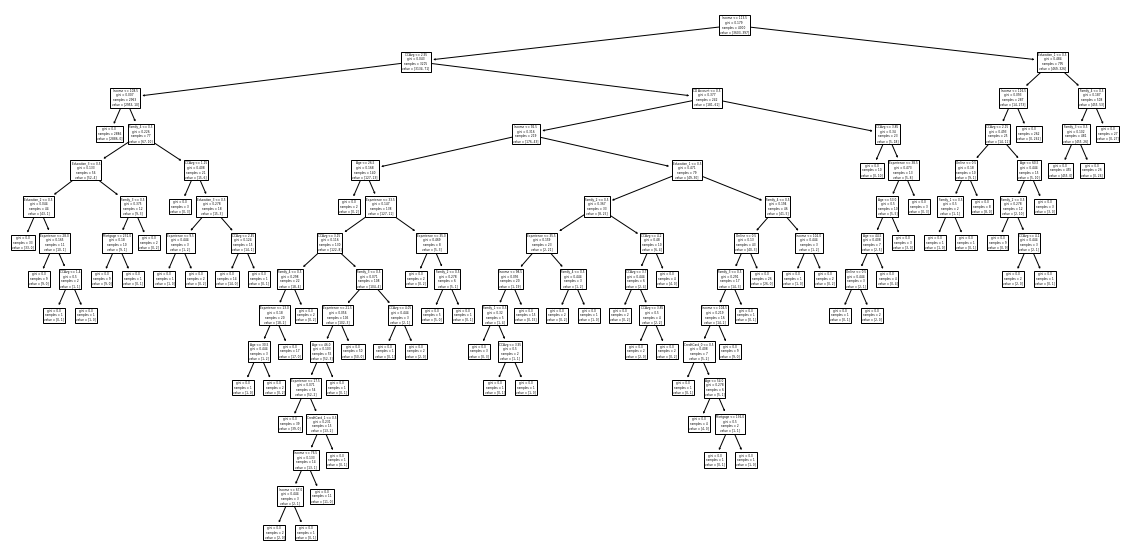

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = feature_names)

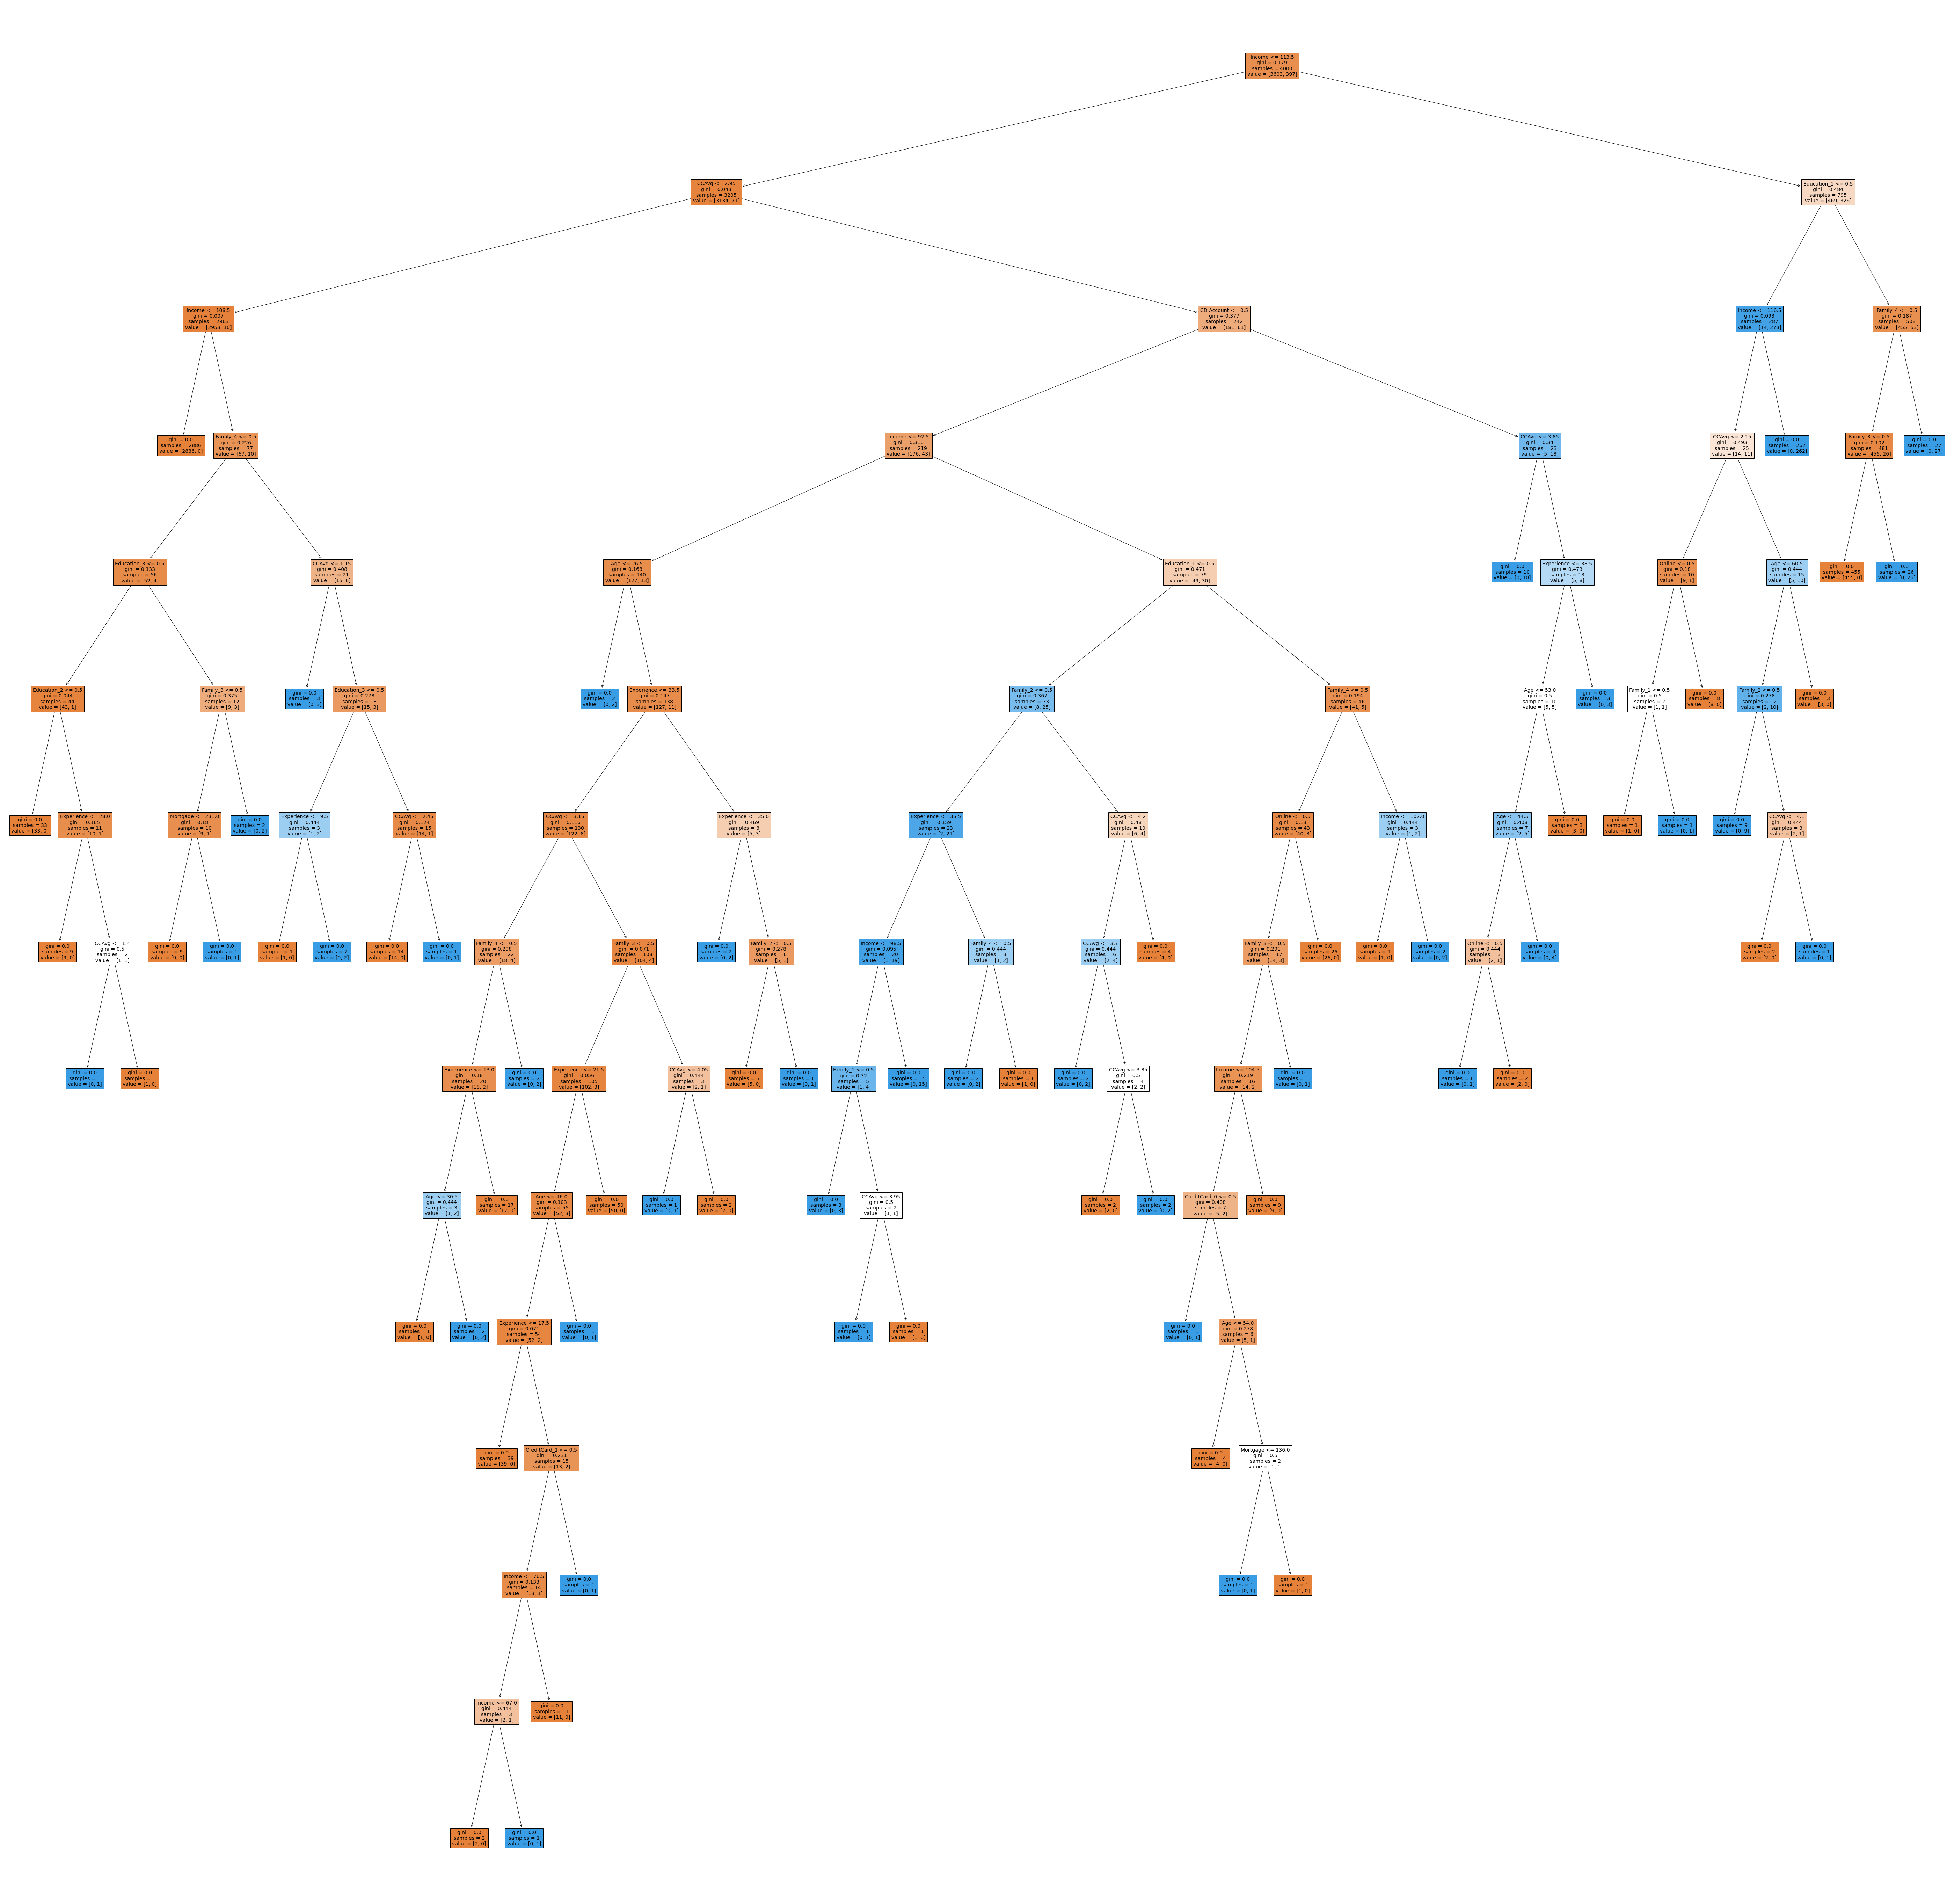

In [63]:
plt.figure(figsize = (100,100))
tree = plot_tree(model, feature_names = feature_names, filled = True)